In [36]:
#importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
!pip install pmdarima
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [37]:
df = pd.read_csv('SBI_Historical_Data.csv')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 07, 2020",190.65,191.45,192.10,189.55,44.82M,-0.16%
1,"Aug 06, 2020",190.95,192.30,194.50,190.25,59.74M,-0.26%
2,"Aug 05, 2020",191.45,192.75,196.85,191.00,68.89M,-0.08%
3,"Aug 04, 2020",191.60,193.35,193.80,190.50,43.87M,-0.34%
4,"Aug 03, 2020",192.25,192.00,194.60,190.05,72.46M,0.42%


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1385 non-null   object 
 1   Price     1385 non-null   float64
 2   Open      1385 non-null   float64
 3   High      1385 non-null   float64
 4   Low       1385 non-null   float64
 5   Vol.      1385 non-null   object 
 6   Change %  1385 non-null   object 
dtypes: float64(4), object(3)
memory usage: 75.9+ KB


# Checking for missing values

In [39]:
df.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

# Dimension of dataset

In [40]:
df.shape

(1385, 7)

# converting to date

In [41]:
df['Date']= pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1385 non-null   datetime64[ns]
 1   Price     1385 non-null   float64       
 2   Open      1385 non-null   float64       
 3   High      1385 non-null   float64       
 4   Low       1385 non-null   float64       
 5   Vol.      1385 non-null   object        
 6   Change %  1385 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 75.9+ KB


# Statistical summary

In [42]:
df.describe()

,Price,Open,High,Low
count,1385.000000,1385.000000,1385.000000,1385.000000
mean,266.274404,266.903213,270.343682,262.757906
std,45.555277,45.590664,45.829745,45.248334
min,150.850000,151.950000,153.200000,148.250000
25%,245.650000,245.900000,248.800000,242.550000
50%,270.800000,271.150000,274.600000,267.400000
75%,296.150000,296.500000,300.750000,292.200000
max,372.400000,371.950000,373.800000,366.200000


In [43]:
# INDEX THE DATASET WITH SET

df=df.set_index('Date')
df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2020-08-07,190.65,191.45,192.10,189.55,44.82M,-0.16%
2020-08-06,190.95,192.30,194.50,190.25,59.74M,-0.26%
2020-08-05,191.45,192.75,196.85,191.00,68.89M,-0.08%
2020-08-04,191.60,193.35,193.80,190.50,43.87M,-0.34%
2020-08-03,192.25,192.00,194.60,190.05,72.46M,0.42%
...,...,...,...,...,...,...
2015-01-07,300.15,300.00,302.55,295.15,15.05M,0.08%
2015-01-06,299.90,310.00,311.10,298.70,15.33M,-4.11%
2015-01-05,312.75,316.25,316.80,312.10,9.14M,-0.79%


# VISUALIZATION

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

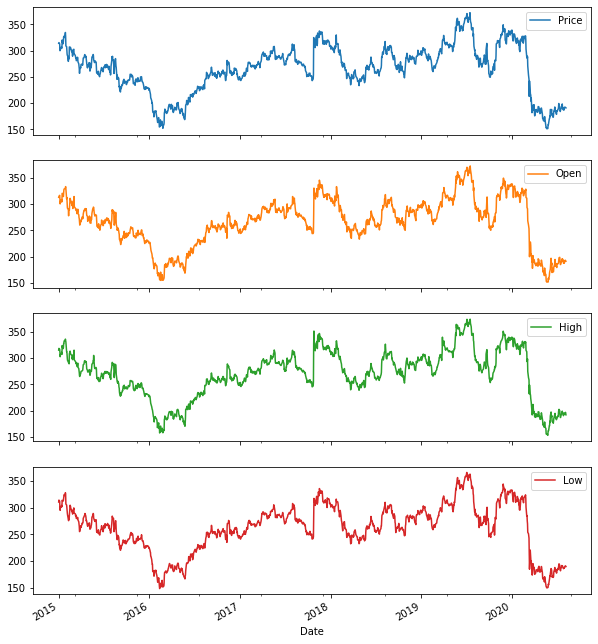

In [44]:
df.plot(subplots=True, figsize=(10, 12))

<AxesSubplot:xlabel='Date'>

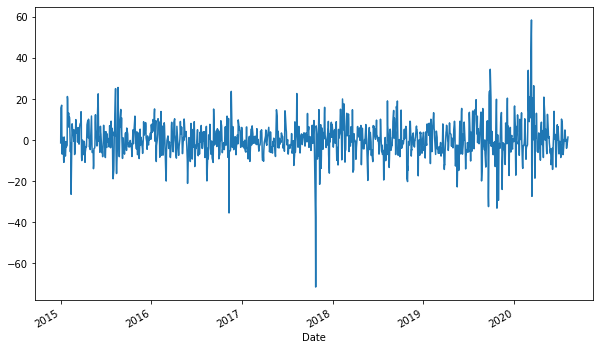

In [45]:
df.Low.diff(2).plot(figsize=(10, 6))

<AxesSubplot:xlabel='Date'>

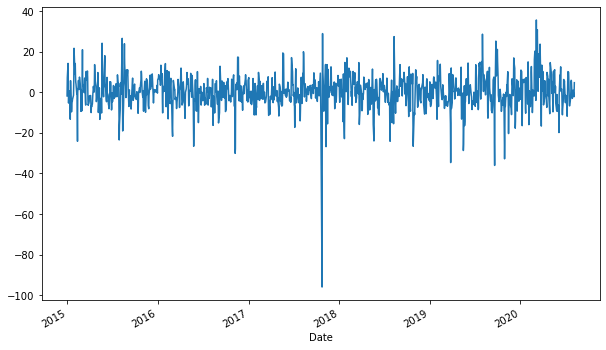

In [46]:
df.High.diff(2).plot(figsize=(10, 6))

<BarContainer object of 56 artists>

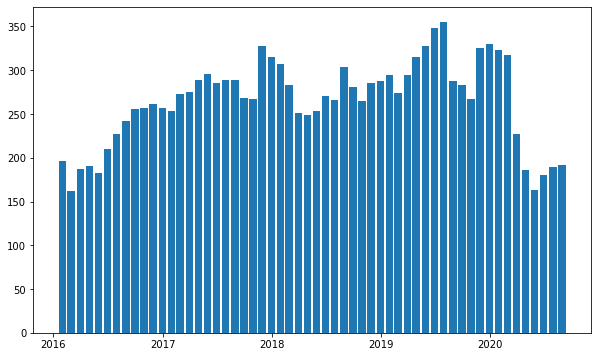

In [47]:
# Resampling the time series data based on monthly 'M' frequency
df_month = df.resample("M").mean()
  
# using subplot
fig, ax = plt.subplots(figsize=(10, 6))
  
# plotting bar graph
ax.bar(df_month['2016':].index, 
       df_month.loc['2016':, "Price"], 
       width=25, align='center')

# ADF TEST

In [48]:
# result of adfuller function is stored in a res variable
res = adfuller(df.Price)
 
# Printing the statistical result of the adfuller test
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])

Augmneted Dickey_fuller Statistic: -2.683735
p-value: 0.076895


In [49]:
# printing the critical values at different alpha levels

print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

critical values at different levels:
	1%: -3.435
	5%: -2.864
	10%: -2.568


# KPSS TEST

In [50]:
res1 = kpss(df.Price)
res1

(0.7574604702936184,
 0.01,
 21,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

# DECOMPOSING

In [51]:
result=seasonal_decompose(df['Price'], model='multiplicable', period=12)
result

<AxesSubplot:xlabel='Date'>

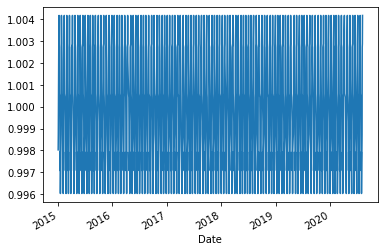

In [52]:
result.seasonal.plot()

<AxesSubplot:xlabel='Date'>

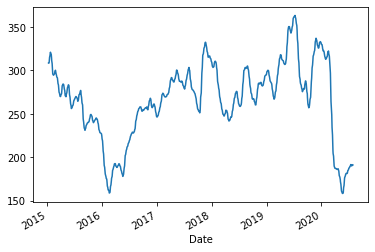

In [53]:
result.trend.plot()

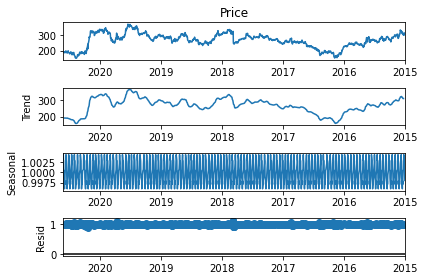

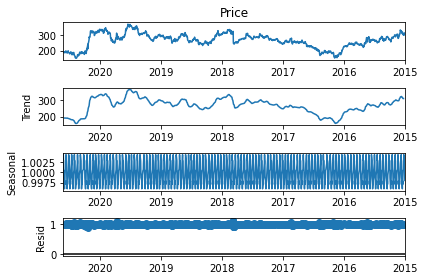

In [54]:
result.plot()

## Forecast about the stock price using ARIMA

In [55]:
stepwise_fit = auto_arima(df['Price'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   #don't want to know if an order does not work
                          suppress_warnings = True,  #don't want convergence warnings
                          stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=7.23 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=12277.383, Time=0.13 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=9304.375, Time=2.51 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=10994.372, Time=2.93 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=12278.622, Time=0.10 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=9622.664, Time=0.40 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=9200.851, Time=4.77 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=13.85 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=6.71 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=12273.104, Time=3.52 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=9201.175, Time=5.99 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=9201.252, Time=6.70 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=10994.311, Time=8.02 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=9194.121, Time=15.72 sec
 ARIMA(2,0,1)(1,1,0)[12] in

In [56]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1385
Model:             SARIMAX(2, 0, 1)x(2, 1, [], 12)   Log Likelihood               -4590.323
Date:                             Wed, 12 Oct 2022   AIC                           9192.646
Time:                                     15:27:27   BIC                           9223.994
Sample:                                          0   HQIC                          9204.376
                                            - 1385                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9421      0.017    111.181      0.000       1.908       1.976
ar.L2         -0.9447      0.017    -57.009      0.000      -0.977      -0.912
ma.L1         -0.9629      0.022    -44.501      0.000      -1.005      -0.921
ar.S.L12      -0.5995      0.016    -36.813      0.000      -0.631      -0.568
ar.S.L24      -0.2748      0.018    -14.878      0.000      -0.311      -0.239
sigma2        46.6973      0.947     49.307      0.000      44.841      48.554
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):              2761.04
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               0.59   Skew:                            -0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
# Split data into train-test sets
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:] # set one year-(12 months) for testing

In [58]:
# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(df['Price'], 
                order = (0, 1, 1), 
                seasonal_order =(2, 1, 1, 12))
  
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Price   No. Observations:                 1385
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood               -4427.116
Date:                            Wed, 12 Oct 2022   AIC                           8864.231
Time:                                    15:27:34   BIC                           8890.351
Sample:                                         0   HQIC                          8874.005
                                           - 1385                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0028      0.022      0.130      0.897      -0.040       0.045
ar.S.L12       0.0684      0.026      2.620      0.009       0.017       0.120
ar.S.L24       0.0105      0.031      0.337      0.736      -0.050       0.071
ma.S.L12      -0.9989      0.182     -5.487      0.000      -1.356      -0.642
sigma2        35.7522      6.204      5.763      0.000      23.592      47.912
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             12641.46
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.56   Skew:                            -1.14
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Predictions of Arima model against the test dataset

<AxesSubplot:xlabel='Date'>

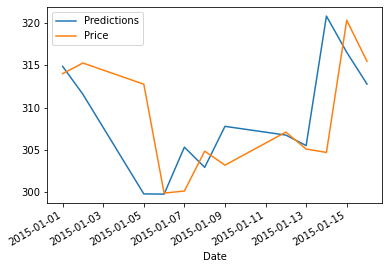

In [59]:
start = len(train)
end = len(train) + len(test) - 1

#predictions for one yr against the test set
predictions = result.predict(start,end,typ = 'levels').rename('Predictions')

#plot prediction and actulal values
predictions.plot(legend = True)
test['Price'].plot(legend = True)

# Evaluating models using RMSE and MSE

In [60]:
# Calculate root mean squared error
rmse(test["Price"], predictions)

6.544441625839872

In [61]:
# Calculate mean squared error
mean_squared_error(test['Price'],predictions)

42.82971619402563

# Visualization of forecast

<AxesSubplot:xlabel='Date'>

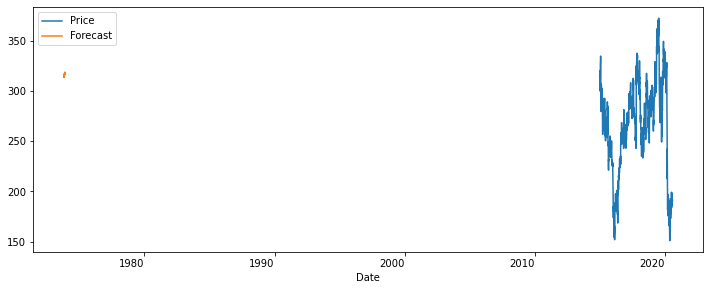

In [62]:
# Train the model on the full dataset
model = model = SARIMAX(df['Price'], 
                        order = (0, 1, 1), 
                        seasonal_order =(2, 1, 1, 12))
result = model.fit()
  
# Forecast for the next 3 years
forecast = result.predict(start = len(df), 
                          end = (len(df)-1) + 3 * 12, 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
df['Price'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)